<a href="https://colab.research.google.com/github/garci843/Unit1_TheLook_Team1/blob/main/Assignment1_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Exploratory Data Analysis (EDA)
### Dataset: Titanic (Kaggle/Public)
Objective: Perform EDA to uncover patterns, relationships, and insights.

## Tasks:
1. Load Titanic dataset into a Pandas DataFrame.
2. Clean data: handle missing values, check data types.
3. Explore summary statistics and distributions.
4. Visualize survival rates by gender, age group, class.
5. Identify potential predictors of survival.
6. Document 3 insights supported by charts/tables.

Deliverable: Notebook with code, visualizations, and written analysis.

Rubric:
- Data preparation: 15%
- Descriptive statistics: 20%
- Visualizations: 20%
- Insights: 30%
- Clarity and organization: 15%


# 1. Load Dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Clean Data

In [6]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Handle missing values
# Age: Fill missing values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked: Fill missing values with the most frequent embarkation point
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabin: Drop the 'Cabin' column as it has too many missing values
df.drop('Cabin', axis=1, inplace=True)

# Check data types
print("\nData types:")
print(df.dtypes)

# Display the first few rows of the cleaned DataFrame
print("\nDataFrame after cleaning:")
display(df.head())

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

DataFrame after cleaning:


/tmp/ipython-input-1407256418.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-1407256418.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 3. Explore Summary Statistics and Distributions

In [7]:
# Display summary statistics for numerical columns
print("Summary statistics for numerical columns:")
display(df.describe())

# Display summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
display(df.describe(include='object'))

# Explore distributions of key variables
print("\nValue counts for 'Survived':")
print(df['Survived'].value_counts())

print("\nValue counts for 'Pclass':")
print(df['Pclass'].value_counts())

print("\nValue counts for 'Sex':")
print(df['Sex'].value_counts())

print("\nValue counts for 'Embarked':")
print(df['Embarked'].value_counts())

Summary statistics for numerical columns:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Summary statistics for categorical columns:


,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,646



Value counts for 'Survived':
Survived
0    549
1    342
Name: count, dtype: int64

Value counts for 'Pclass':
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Value counts for 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64

Value counts for 'Embarked':
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


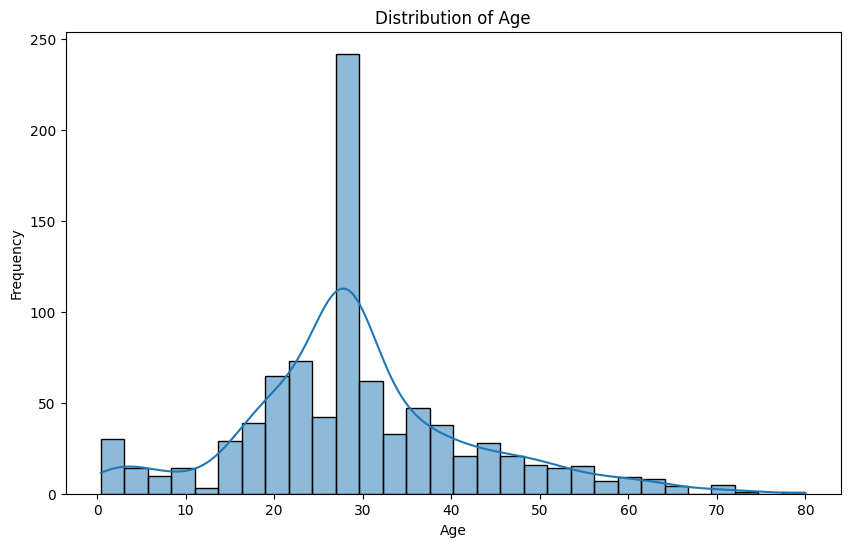

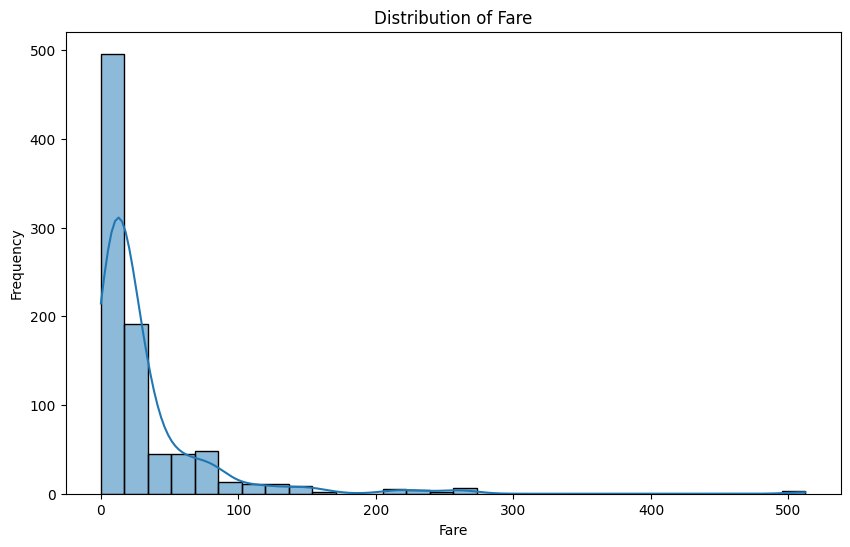

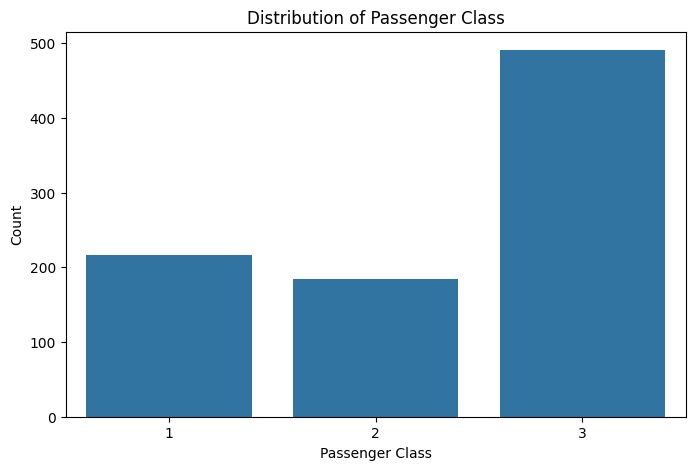

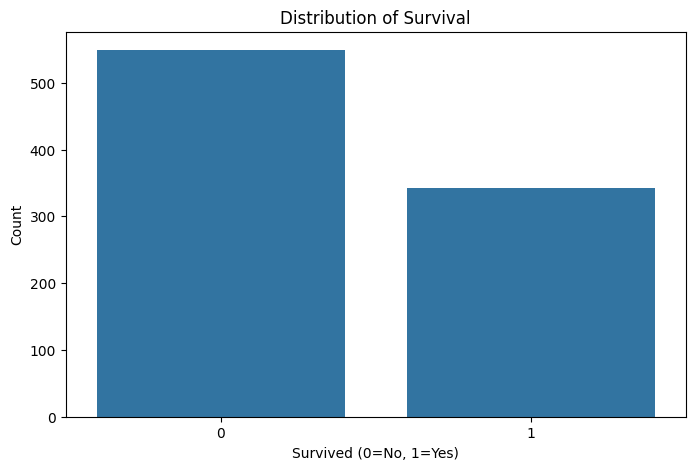

In [8]:
# Visualize the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'Fare'
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of 'Pclass'
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of 'Survived'
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# 4. Visualize Survival Rates by Gender, Age Group, and Class

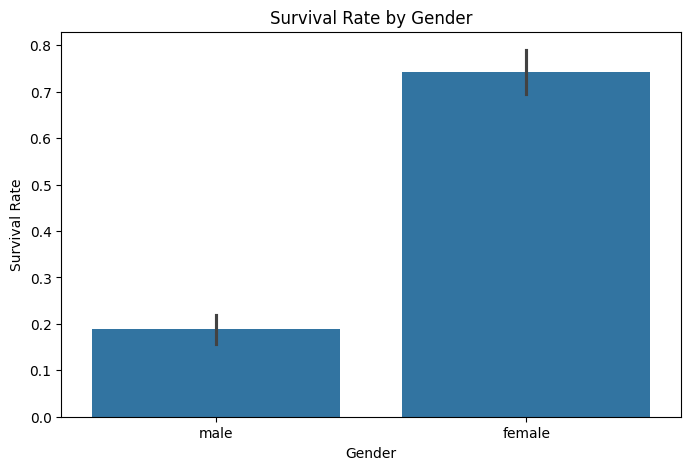

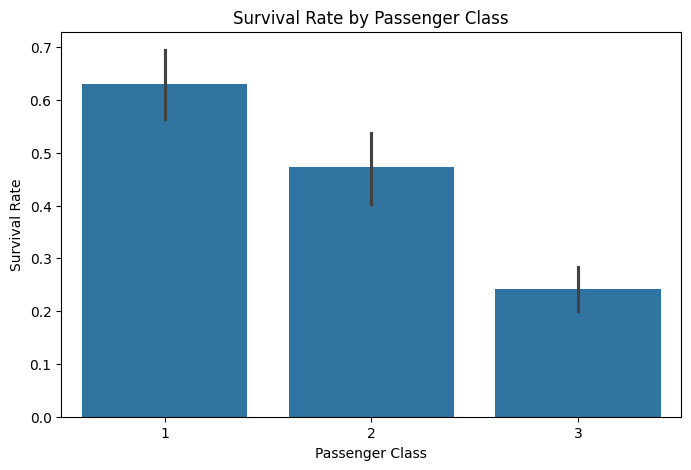

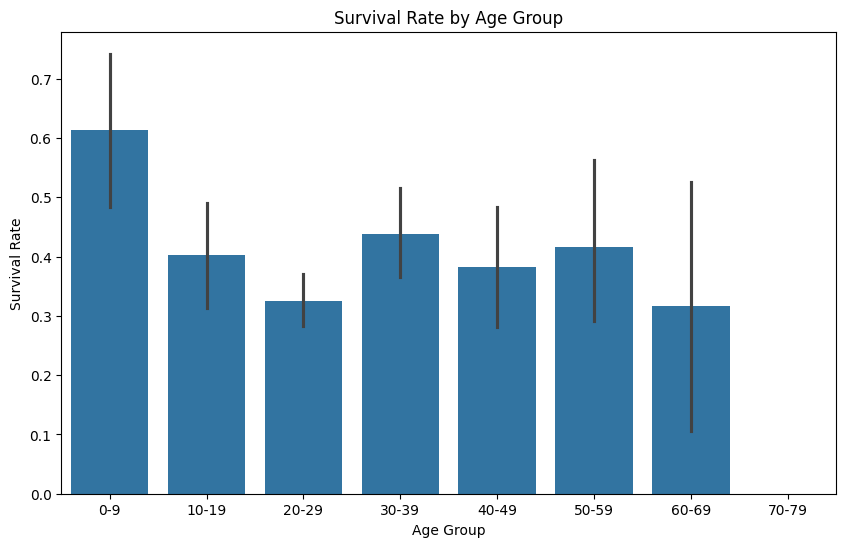

In [9]:
# Visualize survival rate by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Visualize survival rate by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Visualize survival rate by age group (create age groups first)
# Create age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

# 5. Identify Potential Predictors of Survival

In [10]:
# Identify potential predictors of survival

# Correlation matrix for numerical features
print("Correlation matrix for numerical features:")
display(df.select_dtypes(include=['int64', 'float64']).corr()['Survived'].sort_values(ascending=False))

# Explore relationships with categorical features (using cross-tabulation or visualizations)
print("\nSurvival rate by Sex:")
display(pd.crosstab(df['Sex'], df['Survived'], normalize='index'))

print("\nSurvival rate by Pclass:")
display(pd.crosstab(df['Pclass'], df['Survived'], normalize='index'))

print("\nSurvival rate by Embarked:")
display(pd.crosstab(df['Embarked'], df['Survived'], normalize='index'))

print("\nSurvival rate by Age Group:")
display(pd.crosstab(df['AgeGroup'], df['Survived'], normalize='index'))

# You can also visualize these relationships using bar plots as done in the previous step

Correlation matrix for numerical features:


,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.064910
Pclass,-0.338481



Survival rate by Sex:


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908



Survival rate by Pclass:


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363



Survival rate by Embarked:


Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009



Survival rate by Age Group:


Survived,0,1
AgeGroup,,
0-9,0.387097,0.612903
10-19,0.598039,0.401961
20-29,0.675063,0.324937
30-39,0.562874,0.437126
40-49,0.617978,0.382022
50-59,0.583333,0.416667
60-69,0.684211,0.315789
70-79,1.000000,0.000000


# 6. 3 Insights supported by Charts/Tables

1. Much more 3rd class passengers did not survive than 1st class passengers. 75.8% of third class passengers did not survive while 37% of first class passengers did not survive.

2. Females had a significantly higher survival rate than men. This could be because there were 65% men on board and 35% women, but also because women were tended to first as maybe they were seen to be more important to help survive, same with children aged 0-9 who had the highest survival rate among age groups

3. Fare had the highest positive correlation with survival. This means as the fare paid by a passenger increases, there is a slight tendency for their survival rate to also increase. However, The connection between fare and survival is not very strong. While there's a trend, fare alone is not a powerful predictor of whether someone survived or not.